<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [286]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

import statsmodels.api as sm
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
sns.set_context("notebook", font_scale=1.5)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
%matplotlib inline

from IPython.display import Image
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [290]:
df = pd.read_csv('../chaju_w_loan.csv')

In [294]:
df.shape

(5680, 25)

In [293]:
df[df['loan_ym']>='2020-01-01']['is_overdue'].value_counts()

0    1353
1     165
Name: is_overdue, dtype: int64

In [283]:
cred = df[df['loan_ym']>='2020-01-01']['credit_class']
over = df[df['loan_ym']>='2020-01-01']['is_overdue']

a = pd.crosstab(cred, over, margins=True)
a

is_overdue,0,1,All
credit_class,,,
C03,32,2,34
C04,227,11,238
C05,542,26,568
C06,484,62,546
C07,63,36,99
C08,2,28,30
C09,3,0,3
All,1353,165,1518


In [ ]:
lr.predict(x)
y

In [ ]:
lr.predict_proba

In [305]:
df[(df['credit_class']=='C09')&(df['is_overdue']==1)&(df['loan_ym']<'2020-01-01')]

,chaju_id,com_id,sector,loan_prod_1,loan_prod_2,loan_ym,loan_amt,dur_loan,rdm_loan_ym,is_overdue,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,no_child,is_biz
463,C-1180,S05-01017,신용카드사(S05),장기카드대출,장기카드대출(카드론),2016-06-30,5700000,54,2020-12-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
464,C-1180,S05-01017,신용카드사(S05),장기카드대출,장기카드대출(카드론),2016-06-30,5700000,54,2020-12-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
465,C-1180,S05-01017,신용카드사(S05),장기카드대출,장기카드대출(카드론),2016-06-30,5700000,54,2020-12-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
466,C-1180,S05-01017,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2019-05-31,300000,12,2020-05-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
467,C-1180,S05-01017,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2019-05-31,300000,12,2020-05-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
468,C-1180,S05-01017,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2019-05-31,300000,12,2020-05-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
469,C-1180,S05-01017,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2018-07-31,700000,5,2018-12-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
470,C-1180,S05-01017,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2018-07-31,700000,5,2018-12-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
471,C-1180,S05-01017,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2018-07-31,700000,5,2018-12-31,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0
473,C-1180,S21-01020,상호저축은행(S21),개인대출정보(카드대출 제외),신용대출,2018-09-30,14000000,21,2020-06-30,1,C09,808,여성,43,40대,기능/노무직,고등학교 졸업,자가,연립/다세대/빌라,기혼,300-399만원,100-199만원,100-199만원,2,0


In [307]:
df.head()

,chaju_id,com_id,sector,loan_prod_1,loan_prod_2,loan_ym,loan_amt,dur_loan,rdm_loan_ym,is_overdue,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,no_child,is_biz
0,C-1001,S01-01010,은행(S01),개인대출정보(카드대출 제외),주택담보대출,2018-10-31,19000000,7,2019-05-31,0,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,0,0
1,C-1001,S01-01016,은행(S01),개인대출정보(카드대출 제외),예·적금담보대출,2018-12-31,10000000,13,2020-01-31,0,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,0,0
2,C-1001,S05-01011,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2018-11-30,1000000,6,2019-05-31,0,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,0,0
3,C-1001,S05-01015,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2020-04-30,1000000,1,2020-05-31,0,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,0,0
4,C-1001,S05-01015,신용카드사(S05),단기카드대출,단기카드대출(현금서비스),2020-06-30,1200000,5,2020-11-30,0,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,0,0


In [308]:
df = pd.read_csv('CreDB_card.csv', encoding='euc-kr')

In [309]:
df['card_cd'].value_counts()

신용카드(0081)      93688
신용체크카드(0083)     3140
Name: card_cd, dtype: int64

In [315]:
df = pd.read_csv('CreDB_loan.csv', encoding='euc-kr')
df[:100]

,chaju_id,com_id,check_ym,sector_cd,sector,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
0,C-1001,S01-01010,201905,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
1,C-1001,S01-01010,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
2,C-1001,S01-01010,201902,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
3,C-1001,S01-01010,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
4,C-1001,S01-01010,201904,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
5,C-1001,S01-01010,201903,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
6,C-1001,S01-01016,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L200,예·적금담보대출,201812,10000000
7,C-1001,S01-01016,201910,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L200,예·적금담보대출,201812,10000000
8,C-1001,S01-01016,201907,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L200,예·적금담보대출,201812,10000000
9,C-1001,S01-01016,201912,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L200,예·적금담보대출,201812,10000000


In [314]:
df.groupby('chaju_id')['loan_amt'].mean()

chaju_id
C-1001    1.012532e+07
C-1002    2.391667e+06
C-1003    6.135443e+07
C-1004    2.920000e+05
C-1005    8.865500e+07
              ...     
C-2993    6.282353e+06
C-2994    8.600000e+05
C-2995    4.235400e+06
C-2996    1.300000e+07
C-3000    5.377750e+06
Name: loan_amt, Length: 1328, dtype: float64

In [284]:
(a[1] / a['All'])

credit_class
C03    0.058824
C04    0.046218
C05    0.045775
C06    0.113553
C07    0.363636
C08    0.933333
C09    0.000000
All    0.108696
dtype: float64

<AxesSubplot:xlabel='credit_class'>

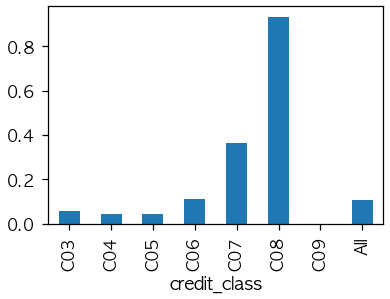

In [285]:
(a[1] / a['All']).plot.bar()

K-S 통계량, 지니계수, 